In [1]:
# url of website we want to scrape
url = 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/'

In [2]:
import requests

In [3]:
# get data from url
alumni = requests.get(url)

In [4]:
# check status >> 200 = success
alumni.status_code

200

In [5]:
# check the text scraped
alumni.text

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n<meta charset="utf-8"/>\n<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n<meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n<meta content="#571963" name="theme-color"/>\n<meta content="Meet the alumni of the Master of Science in Machine Learning and Data Science program at Northwestern University." name="description"/>\n\n<meta content="program" name="sitetype"/>\n<title>Meet our Alumni | People | Master of Science in Machine Learning and Data Science | Northwestern Engineering</title>\n<link href="https://www.mccormick.northwestern.edu/images/structure/favicon.png" rel="icon" type="image/png"/>\n\n\n\n<link href="/css/normalize.css" media="screen" rel="stylesheet"/>\n<link href="/css/jquery/jquery-slick.css" media="screen" rel="stylesheet"/>\n<link href="/css/default.css" media="all" rel="stylesheet"/>\n<link href="/css/layout.css" media="screen" rel="stylesheet"/>\n<link hre

In [6]:
from bs4 import BeautifulSoup

In [7]:
# create soup object
soup = BeautifulSoup(alumni.text)

In [8]:
# for readability
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="#571963" name="theme-color"/>
  <meta content="Meet the alumni of the Master of Science in Machine Learning and Data Science program at Northwestern University." name="description"/>
  <meta content="program" name="sitetype"/>
  <title>
   Meet our Alumni | People | Master of Science in Machine Learning and Data Science | Northwestern Engineering
  </title>
  <link href="https://www.mccormick.northwestern.edu/images/structure/favicon.png" rel="icon" type="image/png"/>
  <link href="/css/normalize.css" media="screen" rel="stylesheet"/>
  <link href="/css/jquery/jquery-slick.css" media="screen" rel="stylesheet"/>
  <link href="/css/default.css" media="all" rel="stylesheet"/>
  <link href="/css/layout.css" media="screen" rel="stylesheet"/>
 

In [9]:
# extract URLs
urls = [link['href'] for link in soup.find_all('a', href=True)]
urls

['http://www.northwestern.edu',
 '/about/index.html',
 '/academics/index.html',
 '/research-faculty/index.html',
 '/offices-services/index.html',
 '/students/index.html',
 '/faculty-staff-resources/index.html',
 '/alumni/index.html',
 'https://www.mccormick.northwestern.edu/corporate-engagement/index.html',
 '/news-events/index.html',
 '/contact/index.html',
 'https://www.mccormick.northwestern.edu',
 '/machine-learning-data-science/current-student-resources/index.html',
 '/machine-learning-data-science/industry-partners/index.html',
 '/machine-learning-data-science/contact-us/index.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science',
 '/machine-learning-data-science/overview/index.html',
 '/machine-learning-data-science/overview/index.html',
 '/machine-learning-data-science/overview/student-body-profile.html',
 '/machine-learning-data-science/overview/career-internship-report.html',
 '/machine-learning-data-science/overview/faq.html',
 '/machine-learning-dat

In [10]:
import re

# pattern to match URLs for alumni class pages
pattern = r"^class-of-\d{4}\.html$"

# filter URLs
filtered_urls = [url for url in urls if re.match(pattern, url)]

# combine scraping URLs with mccormick website
links = ['https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/'+url for url in filtered_urls]
links

['https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2023.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2022.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2021.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2020.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2019.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2018.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2017.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2016.html',
 'https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-2015.html',
 'https://www.mccormick.northwestern.edu/machi

[<!DOCTYPE html>
 <html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
 <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
 <meta content="#571963" name="theme-color"/>
 <meta content="This is a listing of Master of Science in Machine Learning and Data Science program (formerly the Master of Science in Analytics program) graduates of the Class of 2023. Click on a person's name to learn more about their background on LinkedIn or other external site." name="description"/>
 <meta content="program" name="sitetype"/>
 <title>Class of 2023 | People | Master of Science in Machine Learning and Data Science | Northwestern Engineering</title>
 <link href="https://www.mccormick.northwestern.edu/images/structure/favicon.png" rel="icon" type="image/png"/>
 <link href="/css/normalize.css" media="screen" rel="stylesheet"/>
 <link href="/css/jquery/jquery-slick.css" media="screen" rel="styles
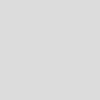
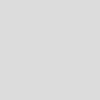
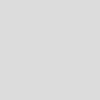

In [11]:
# scrape text from all the links
classes = [BeautifulSoup(requests.get(x).text) for x in links]
classes

In [12]:
# scrape alumni information
alum_d = [
    n.text.strip()
    for x in classes
    for n in x.find_all('div', class_='faculty-info')
]

print(alum_d)

['Yaasir AhmedMSiA Class of 2023Financial Analyst at Synopsys', 'Ziqiao (Bonnie) AoMSiA Class of 2023Data Scientist at Microsoft', 'Yiyang (Jade) CaoMSiA Class of 2023', 'Lixuan (Ellen) ChenMSiA Class of 2023Data Scientist II at\xa0Cisco Systems, Inc.', 'Robert (Zhitao) ChenMSiA Class of 2023ChainNext Intelligent Tech', 'Siche (Evelyn) ChenMSiA Class of 2023', 'Yi ChenMSiA Class of 2023Data Scientist at Didi Global', 'Yuexin (Cindy) ChenMSiA Class of 2023Software Engineer at Oracle', 'Yiqing (Kelvin) ChengMSiA Class of 2023Quantitative Analytics at\xa0JP Morgan', 'Tommy CowheyMSiA Class of 2023', 'Licheng DuMSiA Class of 2023Data Scientist at 2nd Order Solution', 'Yucheng (Eric) FengMSiA Class of 2023Software Development Engineer at Amazon', 'Cameran FrankMSiA Class of 2023Independent Contract Worker', 'Yue (Leah) GaoMSiA Class of 2023Paylocity', 'Brian HongMSiA Class of 2023', 'Hanwei HuMSiA Class of 2023Self-employed', 'Hye Won (Nicole) HwangMSiA Class of 2023', 'Kiran JyothiMSiA Cla

In [13]:
import re

In [14]:
# extract name before 'MSiA'
name = [item.split('MSiA', 1)[0].strip() if 'MSiA' in item else '' for item in alum_d]

print(name)

['Yaasir Ahmed', 'Ziqiao (Bonnie) Ao', 'Yiyang (Jade) Cao', 'Lixuan (Ellen) Chen', 'Robert (Zhitao) Chen', 'Siche (Evelyn) Chen', 'Yi Chen', 'Yuexin (Cindy) Chen', 'Yiqing (Kelvin) Cheng', 'Tommy Cowhey', 'Licheng Du', 'Yucheng (Eric) Feng', 'Cameran Frank', 'Yue (Leah) Gao', 'Brian Hong', 'Hanwei Hu', 'Hye Won (Nicole) Hwang', 'Kiran Jyothi', 'Ishu Kalra', 'Alejandra Lelo de Larrea Ibarra', 'Jiusi Li', 'Zhengyuan (Donald) Li', 'Hao Liang', 'Henry Liang', 'Ruoxuan (Michelle) Liu', 'Ziyan (Cheryl) Liu', 'Sharika Mahadevan', 'Yuwen Meng', 'Ruben Nakano', 'Bannasorn (Boss) Paspanthong', 'Riu Sakaguchi', 'Xin (Susie) Shu', 'Sam Swain', 'Enzhao (Enzo) Wang', 'Shirley (Xueqing) Wang', 'Xingyu (Vivi) Wang', 'Yifei Wang', 'Zijian Wang', 'Ke (Coco) Xu', 'Yiyue (Jessie) Xu', 'Andrew Yaholkovsky', 'Anthony Yang', 'Chunxue (April) Yang', 'Linyue Zhang', 'Wencheng Zhang', 'Yumeng (Rena) Zhang', 'Weiyan Zhou', 'Yin Zhou', 'Ziyi (Komono) Zhou', 'Alisher  Akhatov', 'Haoyang (Bill)  Cai', 'Qianyin (Cha

In [15]:
# extract years
year = [re.search(r'(20[1-2][0-9])', item).group(1) for item in alum_d if re.search(r'(20[1-2][0-9])', item)]

print(year)

['2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021',

In [16]:
# extract text after the number
career = [re.search(r'(\d+)(.*)', text).group(2).strip() 
           for text in alum_d if re.search(r'(\d+)(.*)', text)]

print(career)

#if contain scientist, employed, engineer, analyst > go to job title else go to company 

['Financial Analyst at Synopsys', 'Data Scientist at Microsoft', '', 'Data Scientist II at\xa0Cisco Systems, Inc.', 'ChainNext Intelligent Tech', '', 'Data Scientist at Didi Global', 'Software Engineer at Oracle', 'Quantitative Analytics at\xa0JP Morgan', '', 'Data Scientist at 2nd Order Solution', 'Software Development Engineer at Amazon', 'Independent Contract Worker', 'Paylocity', '', 'Self-employed', '', 'Senior Consultant at EXL Services', 'AI/ML Scientist at Citi', 'Applied AI Associate at Deloitte', 'Data Scientist at CVS', 'Data Scientist at\xa0W. W. Grainger, Inc.', 'Roche Molecular', '', 'Analyst at Analysis Group', 'Data Scientist at\xa0FocusKPI', 'Analytics Engineer at Netflix', 'Associate Data Scientist at Gallagher', 'Senior Data Analyst at\xa0Greater Chicago Food Depository', 'Data Scientist at Discover', 'Data Scientist at SomniQ', 'Data Scientist at Entrata', 'Data Scientist at Aspen Dental', '', 'Machine Learning Engineer at TikTok', 'Risk Data Analyst at American Fir

In [17]:
career = [item.replace('at\xa0', 'at ') for item in career]
print(career)

['Financial Analyst at Synopsys', 'Data Scientist at Microsoft', '', 'Data Scientist II at Cisco Systems, Inc.', 'ChainNext Intelligent Tech', '', 'Data Scientist at Didi Global', 'Software Engineer at Oracle', 'Quantitative Analytics at JP Morgan', '', 'Data Scientist at 2nd Order Solution', 'Software Development Engineer at Amazon', 'Independent Contract Worker', 'Paylocity', '', 'Self-employed', '', 'Senior Consultant at EXL Services', 'AI/ML Scientist at Citi', 'Applied AI Associate at Deloitte', 'Data Scientist at CVS', 'Data Scientist at W. W. Grainger, Inc.', 'Roche Molecular', '', 'Analyst at Analysis Group', 'Data Scientist at FocusKPI', 'Analytics Engineer at Netflix', 'Associate Data Scientist at Gallagher', 'Senior Data Analyst at Greater Chicago Food Depository', 'Data Scientist at Discover', 'Data Scientist at SomniQ', 'Data Scientist at Entrata', 'Data Scientist at Aspen Dental', '', 'Machine Learning Engineer at TikTok', 'Risk Data Analyst at American First Finance', 'A

In [18]:
keywords = ['scientist', 'employed', 'engineer', 'analyst', 'freelance', 'worker']

job_t = []
company = []

for item in career:        
    if item == '':
        job_t.append('None')
        company.append('None')
    elif ' at ' in item:  # Split by 'at' if it exists
        job_title, comp = item.split(' at ', 1)
        job_t.append(job_title.strip())
        company.append(comp.strip())
            
    # Check if any of the keywords are in the item (case insensitive) and parse job title and company
    elif any(k.lower() in item.lower() for k in keywords):
        # Match the first two words for job title, rest as company
        match = re.search(r'(\S+ \S+)\s+(.*)', item)  
        if match:
            job_title, comp = match.groups()
            job_t.append(job_title.strip())
            company.append(comp.strip())
        else:
            job_t.append(item.strip())
            company.append('None')
    else:
        job_t.append('None')
        company.append(item.strip())

In [19]:
print(job_t)

['Financial Analyst', 'Data Scientist', 'None', 'Data Scientist II', 'None', 'None', 'Data Scientist', 'Software Engineer', 'Quantitative Analytics', 'None', 'Data Scientist', 'Software Development Engineer', 'Independent Contract', 'None', 'None', 'Self-employed', 'None', 'Senior Consultant', 'AI/ML Scientist', 'Applied AI Associate', 'Data Scientist', 'Data Scientist', 'None', 'None', 'Analyst', 'Data Scientist', 'Analytics Engineer', 'Associate Data Scientist', 'Senior Data Analyst', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'None', 'Machine Learning Engineer', 'Risk Data Analyst', 'Associate Product Analyst', 'None', 'Machine Learning Engineer', 'Data Scientist', 'Lead Insights Manager', 'Associate Data Scientist', 'None', 'None', 'None', 'None', 'None', 'Business Intelligence Analyst', 'None', 'Data Scientist', 'Senior Analyst, Data Science & Analytics', 'Senior Analyst, Data Science & Analytics', 'Data Scientist', 'Senior Analyst, Data Science & Anal

In [20]:
print(company)

['Synopsys', 'Microsoft', 'None', 'Cisco Systems, Inc.', 'ChainNext Intelligent Tech', 'None', 'Didi Global', 'Oracle', 'JP Morgan', 'None', '2nd Order Solution', 'Amazon', 'Worker', 'Paylocity', 'None', 'None', 'None', 'EXL Services', 'Citi', 'Deloitte', 'CVS', 'W. W. Grainger, Inc.', 'Roche Molecular', 'None', 'Analysis Group', 'FocusKPI', 'Netflix', 'Gallagher', 'Greater Chicago Food Depository', 'Discover', 'SomniQ', 'Entrata', 'Aspen Dental', 'None', 'TikTok', 'American First Finance', 'Ancestry.com', 'None', 'Huawei', 'Districon', 'Nike', 'Bread Financial', 'None', 'None', 'None', 'Aspen Dental', 'None', 'Caterpillar', 'None', 'The Trade Desk', 'TransUnion', 'TransUnion', 'Walmart', 'TransUnion', 'None', 'BCBS of Illinois, Monstana, New Mexico, Oklahoma & Texas', 'None', 'None', '84.51', 'Discover', 'PayPal', 'Cedar', 'None', 'None', 'None', 'TransUnion', 'Petronas', 'Statsig', 'None', 'Fyllo', 'McKinsey & Company', 'Snowflake', 'Health Management Associates (HMA)', 'TikTok', 'Ba

In [21]:
import pandas as pd

In [22]:
# create dataFrame
data = {
    'Name': name,
    'Year': year,
    'Role': job_t,
    'Company': company
}

# Create DataFrame
df = pd.DataFrame(data)

df.tail()

,Name,Year,Role,Company
1303,Colin Watts-Fitzgerald,2013,Lead Data Scientist,HERE Technologies
1304,Qifan Wu,2013,"Director, Strategy Data Science",ByteDance
1305,Robert Yan Xue,2013,Data Science Manager,Outreach
1306,Qi Yang,2013,CEO,深圳酒香天下酒业有限公司
1307,Alice Zhao,2013,"Data Scientist, Instructor",A Dash of Data & Author of SQL Pocket Guide (O...


In [23]:
# delete duplicated rows
df = df.drop_duplicates()

In [24]:
import numpy as np

In [25]:
# filter the 'None' value out
filtered_df = df[df != 'None']

# using value_counts to get the top 5 companies
top_companies = filtered_df['Company'].value_counts().head(5)

# print the result
print(top_companies)

Company
Meta              13
Facebook          13
TransUnion        13
Amazon            12
Coupa Software     8
Name: count, dtype: int64


In [26]:
# using value_counts to get the top 5 roles
top_roles = filtered_df['Role'].value_counts().head(5)

# print the result
print(top_roles)

Role
Data Scientist           119
Senior Data Scientist     30
Lead Data Scientist        6
Data Scientist II          6
Data Science Manager       5
Name: count, dtype: int64


The top 5 companies which alumnus are currently working at are listed above.

In [27]:
# checking the number of alumnus in each year
alumni_count_per_year = filtered_df['Year'].value_counts()

# Print the result
print(alumni_count_per_year)

Year
2023    49
2020    47
2019    46
2022    42
2021    41
2018    41
2017    40
2016    38
2015    31
2014    31
2013    30
Name: count, dtype: int64


From the data above, we can see the increase in number of students meaning more people likely applied for the program in each year or the program decided to take more students.

In [28]:
# pickle the df
df.to_pickle('df.pkl')